### Introduction

House Prices - Advanced Regression Techniques is a competition that allows competitors to predict the final price of homes through understanding influences to price. It aims to identify more complex and indirect features, rather than assuming simple features like number of bedrooms and fences. The competition focuses on feature engineering/importance and advanced regression techniques such as Random Forest and gradient boosting. It leans more towards an experimentation, learning, and skill-building type of competition, which is why we have chosen to use three different models and their Cross-Validated results to contribute to a more robust analysis. This competition will overall provide a deeper understanding of model evaluation - understanding how different features and algorithms impact predictive performance.

The dataset includes 79 explanatory variables, to give users the ability to understand what exactly will affect a price negotiation of a home, and gain predictive power. It is pre-split into a train set with home features and sale price, and a test file with home features and no sale price. It also includes a description file with detailed definitions of all columns. The dataset provided is diverse, covering almost all aspects of a home, allowing opportunities for creativity and experimentation.

The goal of this project was to build predictive models for housing sale prices, fine-tune them, and identify which algoirthm will provide the most reliable performance. RMSE and MAE are used to evaluate the house price prediction models, as they tell us how far off our predictions are from reality. After exploring and pre-processing the data, we cleaned and scaled features to prepare the data for our three supervised learning models (Linear Regression, Random Forest, and Neural Network). Each model was first validated on a train split, and then validated more robustly using 5-fold Cross Validation. This was used to compare RMSE and MAE across folds.

### Exploratory Analsysis

In [2]:
import os
os.chdir("C://Users//angel//OneDrive//Desktop//KaggleCompetitition-HousingPrices")
os.getcwd()

'C:\\Users\\angel\\OneDrive\\Desktop\\KaggleCompetitition-HousingPrices'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [3]:
test= pd.read_csv(r"test.csv")
train = pd.read_csv(r"train.csv")

In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.shape

(1460, 81)

In [7]:
test.shape

(1459, 80)

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### We can see that the training data includes 1,460 houses and 81 variables, while the testing data includes 1,459 houses and 80 variables. The summary statistics suggest that LotArea and SalePrice have a large range and may be skewed.

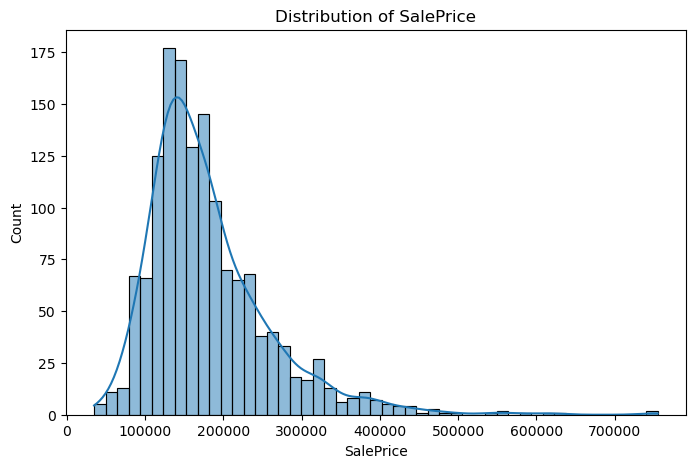

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(train["SalePrice"], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()

### SalePrice is right skewed. It has a significantly number of houses at the lower end of the graph, whereas the higher SalePrice has an extremely low number of houses.

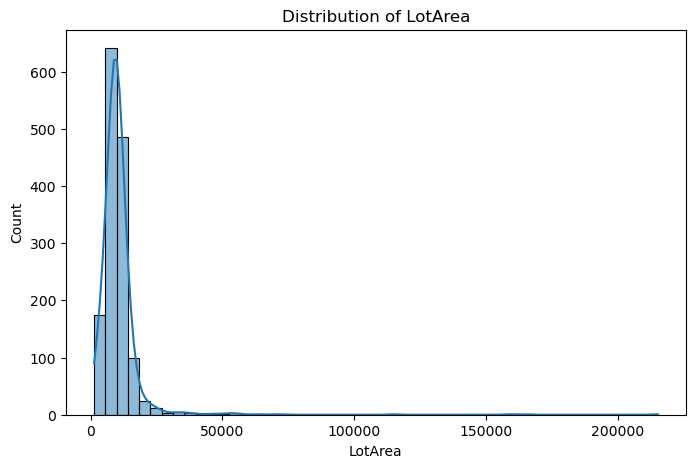

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(train["LotArea"], bins=50, kde=True)
plt.title("Distribution of LotArea")
plt.xlabel("LotArea")
plt.ylabel("Count")
plt.show()

### LotArea is also right-skewed, but it is more skewed than SalePrice. This graph shows that most houses have a smaller lot area, whereas there are few that have extremely large lots. Those values are outliers and influence summary statistics. Now we are going to find the relationship between SalePrice and features we feel are important.

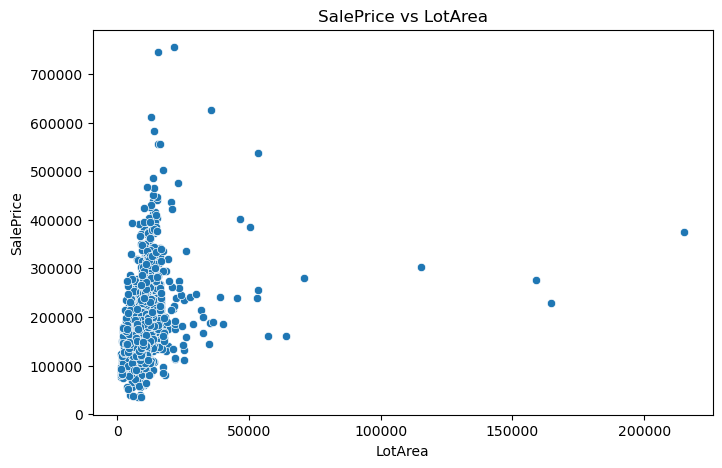

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="LotArea", y="SalePrice", data=train)
plt.title("SalePrice vs LotArea")
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

The scatterplot shows a weak and noisy positive relationship between SalePrice and LotArea. There are a few houses with very large lot sizes, but not as high prices that may act as outliers.

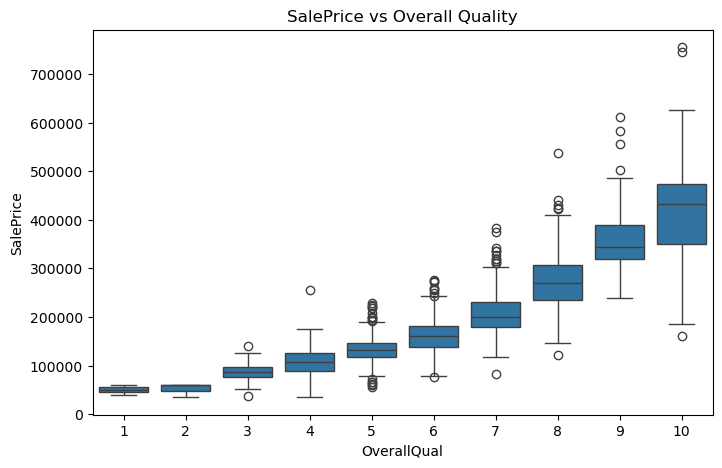

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="OverallQual", y="SalePrice", data=train)
plt.title("SalePrice vs Overall Quality")
plt.show()

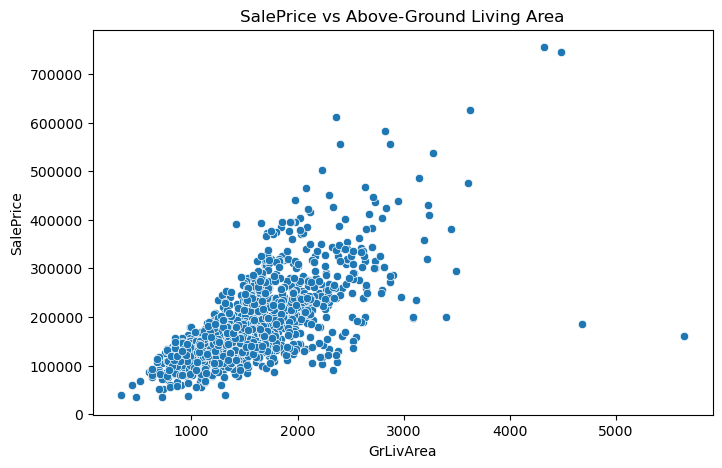

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=train)
plt.title("SalePrice vs Above-Ground Living Area")
plt.show()

The houses with a higher overall quality typically sell for a higher price than those with a lower overall quality. Sale Price and Above-Ground Living Area show a strong positive relationship that is less noisy than Sale Price vs Lot Area.

### Data Preparation and Preprocessing

In [15]:
X = train.drop(columns=["SalePrice"])
y = train["SalePrice"]     #Separating the target (y)

In [16]:
all_features = pd.concat([X, test], axis=0, ignore_index=True) #combining test and train features,
#so we can apply same preprocessing to both

In [17]:
numeric_cols = all_features.select_dtypes(include=[np.number]).columns
categorical_cols = all_features.select_dtypes(exclude=[np.number]).columns
#identify columns

In [18]:
numeric_cols.isnull().sum() #checking for nulls

np.int64(0)

In [19]:
categorical_cols.isnull().sum()

np.int64(0)

In [20]:
all_features.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [21]:
#Filling numeric values in all_features with the median
for col in numeric_cols:
    median_value = all_features[col].median()
    all_features[col] = all_features[col].fillna(median_value)
#Filling numeric values in all_features with the mode   
for col in categorical_cols:
    mode_value = all_features[col].mode()[0]
    all_features[col] = all_features[col].fillna(mode_value)

In [22]:
#convert all categorical variables to dummy variables
all_features_encoded = pd.get_dummies(all_features, drop_first=True)

In [23]:
#split the data back into training and test features
X_encoded = all_features_encoded.iloc[:len(train), :]  
X_test_final = all_features_encoded.iloc[len(train):, :]

In [24]:
#Creating an 80/20 split of X and y
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_train.shape, X_valid.shape

((1168, 245), (292, 245))

### Modeling Stage

### Model 1: Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
lr_model = LinearRegression() #creating linear regression model

In [26]:
lr_model.fit(X_train, y_train) #fitting the model on train data
lr_predict = lr_model.predict(X_valid) #predicting SalePrice

#evaluating model using root mean squared error and mean absolute error
lr_rmse = np.sqrt(mean_squared_error(y_valid, lr_predict))
lr_mae  = mean_absolute_error(y_valid, lr_predict) 

In [27]:
lr_rmse

np.float64(49048.340186964655)

In [28]:
lr_mae

20111.776068145795

### Model 2 - Random Forest Regression

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=300,random_state=42, n_jobs=-1)
#creating random forest model

In [30]:
rf_model.fit(X_train, y_train)  #fitting the model on the training data
rf_predict = rf_model.predict(X_valid) #predicting SalePrice

#evaluating model using root mean squared error and mean absolute error
rf_rmse = np.sqrt(mean_squared_error(y_valid, rf_predict))
rf_mae  = mean_absolute_error(y_valid, rf_predict)

In [31]:
rf_rmse

np.float64(28792.437766516472)

In [32]:
rf_mae

17598.202134703195

### Model 3 - Neural Network

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #Using StandardScaler to scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [34]:
from sklearn.neural_network import MLPRegressor
#Training the MLPRegressor

nn_model = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32), #3 hidden layers with decreasing sizes
    activation='relu', #best method for regression w/ scaled inputs
    solver='adam', #converges quicker and robust for large datasets
    alpha=0.001, #L2 regularization
    learning_rate='adaptive', #rate decreases when progress stalls
    max_iter=2000, 
    early_stopping=True, #max training epochs
    validation_fraction=0.1,
    random_state=42 #standard random state 42 for all to ensure reproducibility
)

nn_model.fit(X_train_scaled, y_train)
nn_predict = nn_model.predict(X_valid_scaled)

In [35]:
nn_rmse = np.sqrt(mean_squared_error(y_valid, nn_predict))
nn_mae  = mean_absolute_error(y_valid, nn_predict)

In [36]:
nn_rmse

np.float64(38051.11976061099)

In [37]:
nn_mae

25076.003098987443

### Fine-Tuning all three models using sklearn and cross validation to attempt to maximize results

In [38]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42) 

In [39]:
#Linear Regression pipeline
from sklearn.linear_model import Ridge
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()), #scaling
    ('ridge', Ridge(alpha=10.0)) #using ridge method
])

In [40]:
#Random Forest pipeline
rf_pipeline = Pipeline([
    ('rf', RandomForestRegressor(
        n_estimators=500, 
        max_depth=20,
        min_samples_leaf=1,
        max_features=0.5,
        random_state=42,
        n_jobs=-1
    ))
])

In [41]:
#Neural Network pipeline
nn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(
        hidden_layer_sizes=(64,32,24),
        activation='relu',
        solver='adam',
        alpha=0.01,
        learning_rate_init=0.001,
        max_iter=3000,
        early_stopping=True,
        random_state=42
    ))
])

In [42]:
#RMSE, calculating results
lr_rmse2 = np.sqrt(-cross_val_score(lr_pipeline, X_encoded, y,
                                   scoring='neg_mean_squared_error', cv=kf))
rf_rmse2 = np.sqrt(-cross_val_score(rf_pipeline, X_encoded, y,
                                   scoring='neg_mean_squared_error', cv=kf))
nn_rmse2 = np.sqrt(-cross_val_score(nn_pipeline, X_encoded, y,
                                   scoring='neg_mean_squared_error', cv=kf))

In [43]:
#MAE, calculating results
lr_mae2 = -cross_val_score(lr_pipeline, X_encoded, y,
                          scoring='neg_mean_absolute_error', cv=kf)
rf_mae2 = -cross_val_score(rf_pipeline, X_encoded, y,
                          scoring='neg_mean_absolute_error', cv=kf)
nn_mae2 = -cross_val_score(nn_pipeline, X_encoded, y,
                          scoring='neg_mean_absolute_error', cv=kf)

In [44]:
print("Linear Regression RMSE per fold:", lr_rmse2)
print("Linear Regression Mean RMSE:", lr_rmse2.mean())

print("Random Forest RMSE per fold:", rf_rmse2)
print("Random Forest Mean RMSE:", rf_rmse2.mean())

print("Neural Network RMSE per fold:", nn_rmse2)
print("Neural Network Mean RMSE:", nn_rmse2.mean())

Linear Regression RMSE per fold: [35050.3686946  28069.94482584 53012.43548702 33327.01387962
 31486.06615374]
Linear Regression Mean RMSE: 36189.16580816366
Random Forest RMSE per fold: [28525.00442282 25173.54842301 41048.00003462 27946.4357139
 22072.93556302]
Random Forest Mean RMSE: 28953.184831474377
Neural Network RMSE per fold: [45655.5811649  44851.76844331 60321.93693004 50902.24270422
 41596.88796664]
Neural Network Mean RMSE: 48665.683441823276


### Performance Evaluation Stage

In [45]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Neural Network"],
    
    #Single split metrics
    "Split RMSE": [lr_rmse, rf_rmse, nn_rmse],
    "Split MAE": [lr_mae, rf_mae, nn_mae],
    
    #Cross-validation metrics
    "CV Mean RMSE": [lr_rmse2.mean(), rf_rmse2.mean(), nn_rmse2.mean()],
    "CV Std RMSE": [lr_rmse2.std(), rf_rmse2.std(), nn_rmse2.std()],
    "CV Mean MAE": [lr_mae2.mean(), rf_mae2.mean(), nn_mae2.mean()],
    "CV Std MAE": [lr_mae2.std(), rf_mae2.std(), nn_mae2.std()]
})

results #printing results in a table format for comparison

,Model,Split RMSE,Split MAE,CV Mean RMSE,CV Std RMSE,CV Mean MAE,CV Std MAE
0,Linear Regression,49048.340187,20111.776068,36189.165808,8724.128277,18744.150501,758.676809
1,Random Forest,28792.437767,17598.202135,28953.184831,6466.914541,16907.279041,1731.106988
2,Neural Network,38051.119761,25076.003099,48665.683442,6548.969011,28968.013449,2688.512156


Linear Regression: predictions were off by about 20k on average, with larger errors around 49k. 
CV Linear Regression: slightly better average performance, with predictions being off by about 36k (the model generalizes well).
Linear regression captures broad trends in hosuing prices and is stable, but it is not the most accurate as it misses complex nonlinear effects. However, CV results show it is very consistent across folds.

Random Forest: lower errors (off by 17.6k) and predictions are close to actual sale prices.
CV Random Forest: confirms strong performance and nearly identical accuracy to single split.
Most accurate and robust model, captures nonlinearities and feature interactions.

Neural Network: Performance is decent, but not as good as random forest (off by about 25k).
CV Neural Network: Errors are must higher across folds, showing poor generalization.

Neural Network is slightly overfitting. It is okay on one split but fails across folds. 

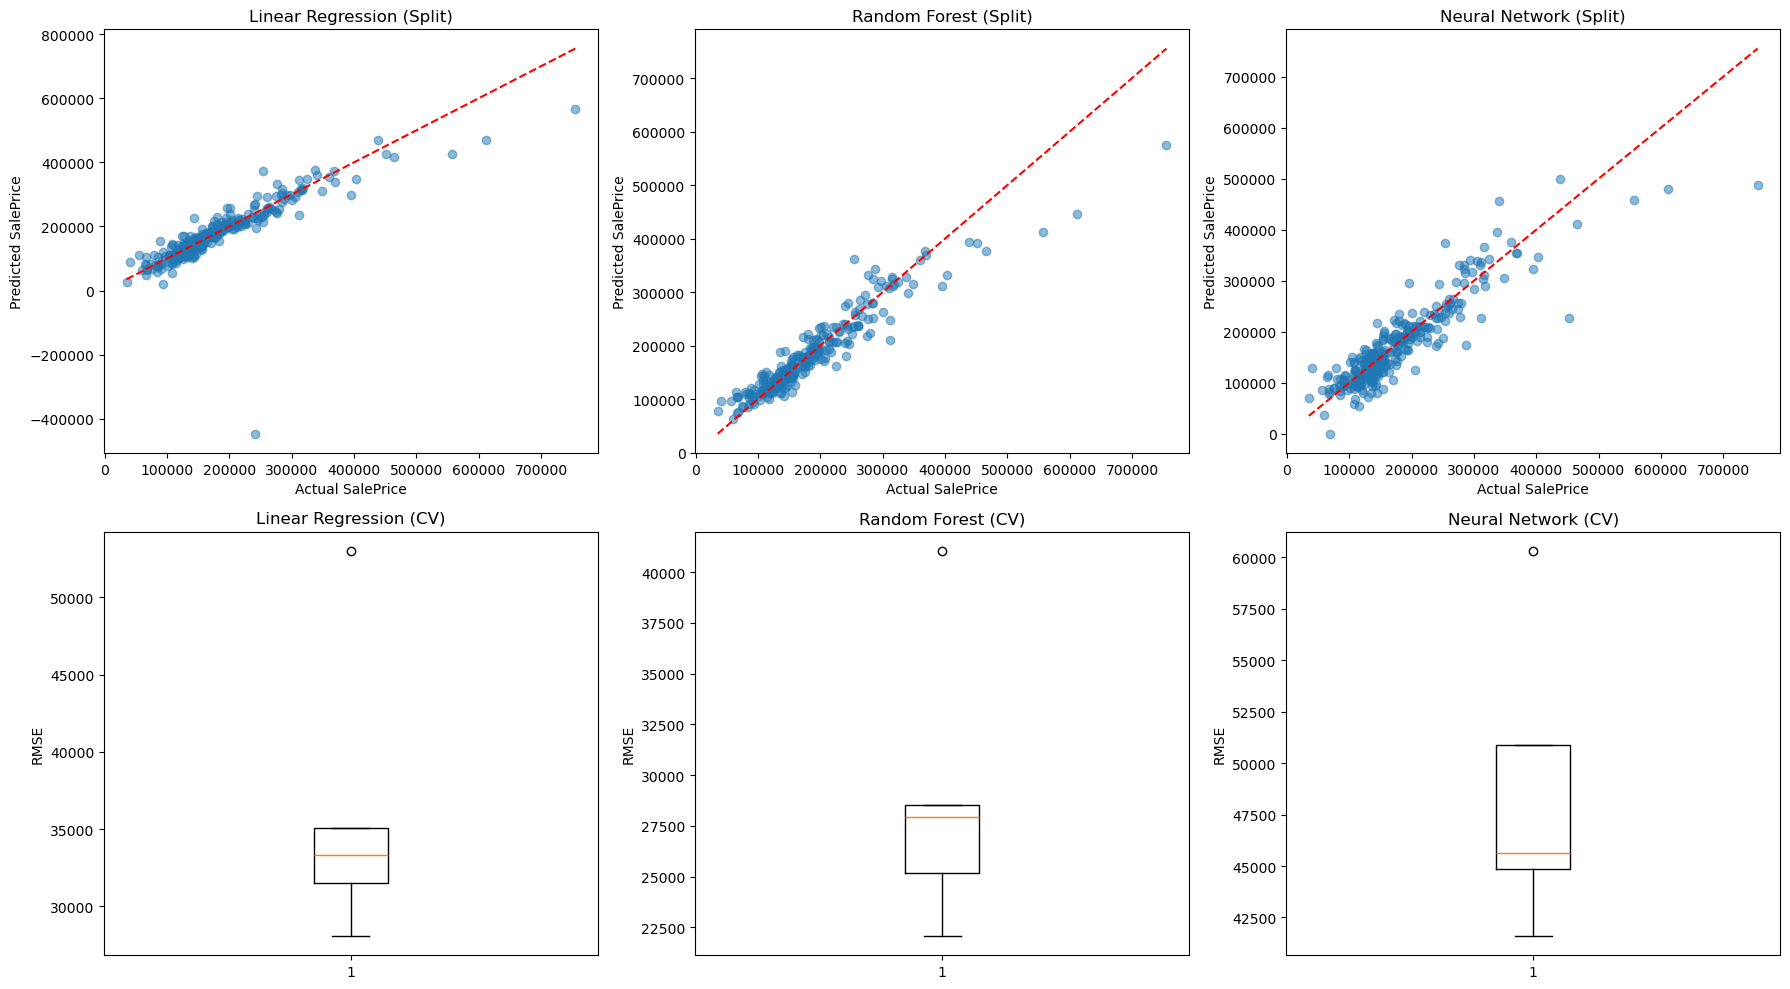

In [46]:
models = {
    "Linear Regression (Split)": lr_predict,
    "Random Forest (Split)": rf_predict,
    "Neural Network (Split)": nn_predict,
    "Linear Regression (CV)": lr_rmse2,   #CV predictions not stored, so show CV fold results
    "Random Forest (CV)": rf_rmse2,
    "Neural Network (CV)": nn_rmse2
}

plt.figure(figsize=(18,10))

for i, (name, preds) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)
    
    if "CV" in name:
        #For CV we only have error arrays, so plot boxplot of fold RMSEs
        plt.boxplot(preds)
        plt.ylabel("RMSE")
        plt.title(name)
    else:
        #For Split we have actual predictions vs. actuals
        plt.scatter(y_valid, preds, alpha=0.5)
        plt.plot([y_valid.min(), y_valid.max()],
                 [y_valid.min(), y_valid.max()],
                 'r--')
        plt.xlabel("Actual SalePrice")
        plt.ylabel("Predicted SalePrice")
        plt.title(name)

plt.tight_layout()
plt.show()

In [53]:
# Predict with your best model (Random Forest here)
rf_pipeline.fit(X_encoded, y)   #fit on training data
test_preds = rf_pipeline.predict(X_test_final)

#Build submission DataFrame
submission = pd.DataFrame({
    "Id": test["Id"],       
    "SalePrice": test_preds
})

#Save to CSV
submission.to_csv("housing_price_predictions.csv", index=False)